In [1]:
train_file_path = r"C:\Users\ADARSH\Desktop\Projects\Machine_learning_project\housing\artifact\data_ingestion\2022-10-11-20-37-21\ingested_data\train\housing.csv"

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv(train_file_path)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [5]:
df.shape

(16512, 10)

In [6]:
x,y=df.drop(columns=["median_house_value"],axis=1),df[["median_house_value"]]

In [7]:
x.shape

(16512, 9)

In [8]:
y.shape

(16512, 1)

In [9]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [10]:
y

,median_house_value
0,72100.0
1,279600.0
2,82700.0
3,112500.0
4,238300.0
...,...
16507,268500.0
16508,90400.0
16509,140400.0
16510,258100.0


In [11]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [12]:
#Handling NULL values
from sklearn.impute import SimpleImputer

In [13]:
numerical_column = x.drop(columns = ["ocean_proximity"],axis = 1)

In [14]:
numerical_column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [15]:
simple_imputer = SimpleImputer(strategy="median")

In [16]:
simple_imputer.fit_transform(numerical_column)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [17]:
df = simple_imputer.transform(numerical_column)

In [18]:
simple_imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [19]:
simple_imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [20]:
x.longitude.median()

-118.51

In [21]:
x.latitude.median()

34.26

In [22]:
#checking for the categorical columns
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [23]:
simple_imputer = SimpleImputer(strategy="most_frequent")
#StandardScaler
#minmaxscaler
#onehotencoder
#levelencoder

In [24]:
#fit,transform and fit_transform

In [25]:
#customer transformer

In [26]:
#customtransforms
#must have atleast two functions
from sklearn.base import BaseEstimator, TransformerMixin


class Test(BaseEstimator,TransformerMixin):
    def __init__(self,strategy="median"):
        self.strategy = strategy
        
    def fit(self,X):
        self.features_ = X.columns
        self.statistic_ = []
        for column in X.columns:
            self.statistic_.append(X[column].median())
        return self

    def transform(self,X:pd.DataFrame):
        for idx,column in enumerate(x.columns):
            X[column].fillna(self.statistic_[idx])
        return X   
    # def fit_transform(self,X):
    #     self.fit(X)
    #     return self.transform(X)

In [27]:
for idx,column in enumerate(x.columns):
    print(idx,column)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [28]:
response = Test().fit(numerical_column)

In [29]:
response.statistic_

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

In [30]:
import numpy as np

In [31]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [32]:
# from tkinter import E


# COLUMN_TOTAL_ROOMS = "total_rooms"
# COLUMN_POPULATION = "population"
# COLUMN_HOUSEHOLDS = "households"
# COLUMN_TOTAL_BEDROOM = "total_bedrooms"

# class FeatureGenerator(BaseEstimator, TransformerMixin):

#     def __init__(self, add_bedrooms_per_room=True,total_rooms_ix=3,population_ix=5,households_ix=6,total_bedrooms_ix=4, columns=None):
        
                   
#         """   FeatureGenerator Initialization add_bedrooms _per_room: bool total_rooms_ix: int index number of total rooms columns population_ix: int index number of total population columns households_ix: int index number of households columns total_bedrooms_ix: int index number of bedrooms columns"""
#         try:
#             self.columns = columns
#             if self.columns is not None:
#                 total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
#                 population_ix = self.columns.index(COLUMN_POPULATION)
#                 households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
#                 total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)
#             self.add_bedrooms_per_room = add_bedrooms_per_room
#             self.total_rooms_ix = total_rooms_ix
#             self.population_ix = population_ix
#             self.households_ix = households_ix
#             self.total_bedrooms_ix = total_bedrooms_ix

#         except Exception as e:
#             raise e
#     def fit(self,X,y=None):
#         return self

#     def transform(self,X,y=None):
#         try:
#             room_per_household = X[:,self.total_rooms_ix]/X[:,self.households_ix]
#             population_per_household = X[:self.population_ix]/X[:,self.households_ix]
#             if self.add_bedrooms_per_room:
#                 bedrooms_per_room = X[:,self.total_bedrooms_ix]/X[:,self.total_rooms_ix]
#                 generated_feature = np.c_[X,room_per_household,population_per_household,bedrooms_per_room]
#             else:
#                 generated_feature = np.c_[X,room_per_household,population_per_household]
            
#             return generated_feature
#         except Exception as e:
#             raise e

            


In [33]:
arr1 = np.arange(10)
arr2 = np.arange(10)

In [34]:
np.c_[arr1,arr2]

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [35]:
# Feature Engineering Pipeline standard way 

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
num_pipeline = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy="median")),
    ('scaling',StandardScaler())
])

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
cat_pipeline = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('oneHotEncoder',OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))
])

In [41]:
df = pd.read_csv(train_file_path)

In [42]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [43]:
num_column_name = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cat_column_name = ['ocean_proximity']

In [44]:
preprocessing = ColumnTransformer([
    ('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline',cat_pipeline,cat_column_name)]
)

In [59]:
train_df = preprocessing.fit_transform(df)

In [46]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [47]:
test_file_path = r"C:\Users\ADARSH\Desktop\Projects\Machine_learning_project\housing\artifact\data_ingestion\2022-10-11-20-37-21\ingested_data\test\housing.csv"

In [48]:
df.shape

(16512, 10)

In [49]:
test_df = pd.read_csv(test_file_path)

In [50]:
test_file_path

'C:\\Users\\ADARSH\\Desktop\\Projects\\Machine_learning_project\\housing\\artifact\\data_ingestion\\2022-10-11-20-37-21\\ingested_data\\test\\housing.csv'

In [51]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [80]:
test_arr = preprocessing.transform(test_df)

In [53]:
import dill

In [54]:
with open('preprocessing.pkl','wb') as prep_file:
    dill.dump(preprocessing,prep_file)
    

In [55]:
with open('preprocessing.pkl','rb') as file_obj:
    preprocessing_loaded_object = dill.load(file_obj)

In [56]:
preprocessing_loaded_object

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHotEncoder',
                                                  OneHotEncoder()),
                                                 ('scaling',
                                              

In [57]:
preprocessing_loaded_object.transform(test_df)

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()

In [67]:
x = train_df

In [68]:
y = np.array(df.median_house_value)

In [69]:
lr.fit(x,y)

LinearRegression()

In [70]:
lr.fit_intercept

True

In [71]:
lr.coef_

array([-5.31584933e+04, -5.40167775e+04,  1.37235561e+04, -1.00221632e+04,
        2.99379195e+04, -4.38158186e+04,  2.89003369e+04,  7.37374434e+04,
        1.30111954e+13,  1.22116471e+13,  2.88410521e+11,  8.26032326e+12,
        8.77404855e+12])

In [72]:
lr.intercept_

-26207297491274.246

In [73]:
y_hat = lr.predict(x)

In [74]:
import matplotlib.pyplot as plt

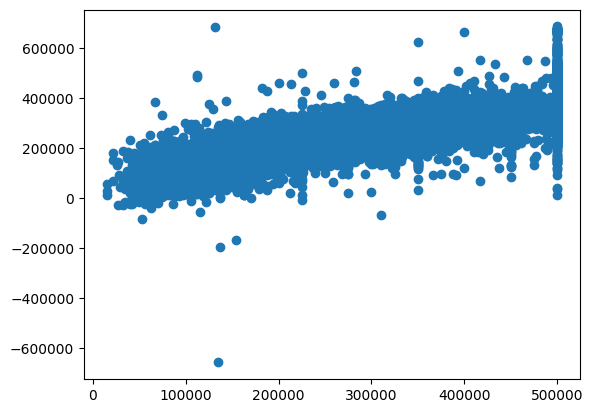

In [76]:
plt.plot(y,y_hat,"o")

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y,y_hat)

0.6438078991191558

In [81]:
yhat_test = lr.predict(test_arr)

In [82]:
y_test = np.array(test_df.median_house_value)

In [83]:
r2_score(y_test,yhat_test)

0.6519946631486805